## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Loading Dataset

In [2]:
filelist=os.listdir('F:\Sales_Data')

In [3]:
for file in filelist:
    print(file)

dataset.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
path='F:\Sales_Data'
dataset=pd.DataFrame()
for file in filelist:
    month=pd.read_csv(path + "/" + file)
    dataset=pd.concat([dataset , month])

In [5]:
dataset.to_csv('F:\Sales_Data\dataset.csv',index=False)

In [6]:
dataset.head(4)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
dataset.shape

(747400, 6)

## Data Preprocessing

In [8]:
dataset.isnull().sum()

Order ID            2180
Product             2180
Quantity Ordered    2180
Price Each          2180
Order Date          2180
Purchase Address    2180
dtype: int64

In [9]:
dataset= dataset.dropna(how="all")

In [10]:
dataset.shape

(745220, 6)

In [11]:
dataset.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,745220,745220,745220,745220,745220,745220
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,1420,87612,674208,87612,1420,1420


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745220 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          745220 non-null  object
 1   Product           745220 non-null  object
 2   Quantity Ordered  745220 non-null  object
 3   Price Each        745220 non-null  object
 4   Order Date        745220 non-null  object
 5   Purchase Address  745220 non-null  object
dtypes: object(6)
memory usage: 39.8+ MB


In [13]:
dataset.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## Monthly Data Analysis

In [14]:
dataset.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [15]:
'04/19/19 08:46'.split('/')[0]

'04'

In [16]:
def month(x):
    return x.split('/')[0]

In [17]:
def day(x):
    return x.split('/')[1]

def year(x):
    return x.split('/')[2]

In [18]:
dataset['Month']=dataset['Order Date'].apply(month)

In [19]:
dataset.tail(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09


In [20]:
dataset.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [21]:
dataset['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [22]:
dataset=dataset[dataset['Month'] != 'Order Date' ]

In [23]:
dataset['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

#### We have to convert the data from string to integer

In [24]:
dataset['Month'] = dataset['Month'].astype(int)

In [25]:
dataset['Quantity Ordered'] = dataset['Quantity Ordered'].astype(int)

In [26]:
dataset['Price Each'] = dataset['Price Each'].astype(float)

In [27]:
dataset.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [28]:
dataset['sales'] = round(dataset['Quantity Ordered'] * dataset['Price Each'])

In [29]:
dataset.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24.0
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,100.0
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0


#### Analysis monthwise

In [30]:
dataset.groupby('Month')['sales'].sum()

Month
1      7290544.0
2      8809988.0
3     11230788.0
4     13565612.0
5     12613016.0
6     10313408.0
7     10593372.0
8      8979772.0
9      8392124.0
10    14950104.0
11    12801196.0
12    18457728.0
Name: sales, dtype: float64

In [31]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<ipython-input-49-78d534bd5282>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(month,Color="black", fontsize=16)
<ipython-input-49-78d534bd5282>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Monthly Sale' , Color="black" , fontsize=20)
<ipython-input-49-78d534bd5282>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Month' , Color="black", fontsize=16)
<ipython-input-49-78d534bd5282>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Sales in US Doller' , Color="black", fontsize=16)


Text(0, 0.5, 'Sales in US Doller')

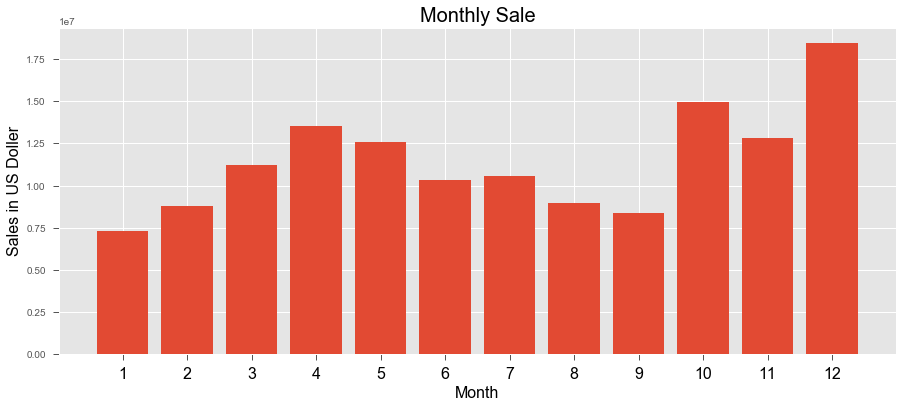

In [49]:
from matplotlib.pyplot import figure
figure(figsize=(15, 6))
month= range(1,13)
plt.style.use(['ggplot'])
plt.bar(month,dataset.groupby('Month')['sales'].sum())
plt.xticks(month,Color="black", fontsize=16)
plt.title('Monthly Sale' , Color="black" , fontsize=20)
plt.xlabel('Month' , Color="black", fontsize=16)
plt.ylabel('Sales in US Doller' , Color="black", fontsize=16)

## Analyzing in which loaction most orders were placed

In [33]:
def city(y):
    return y.split(',')[1]

dataset['City']=dataset['Purchase Address'].apply(city)

In [39]:
dataset.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24.0,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,100.0,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12.0,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,12.0,Los Angeles,9


Text(0.5, 1.0, 'City')

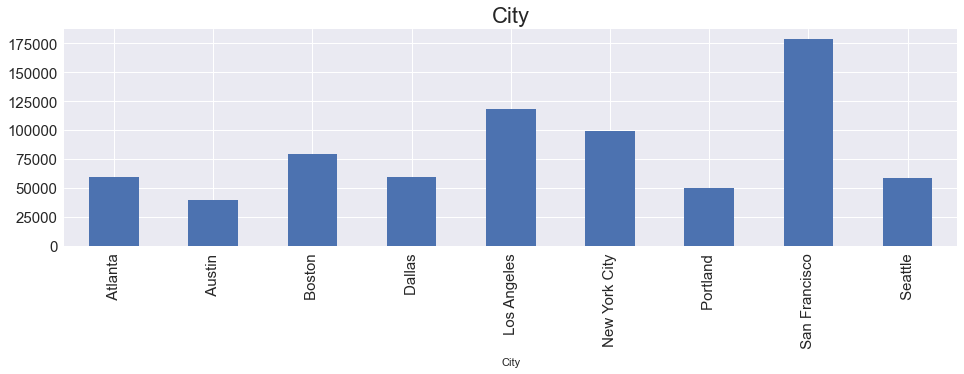

In [42]:
figure(figsize=(16, 4))
plt.style.use(['seaborn'])
dataset.groupby('City')['City'].count().plot.bar(fontsize=15)
plt.title('City', fontsize=22)

## Hourly Data set

In [36]:
dataset['Hour']=pd.to_datetime(dataset['Order Date']).dt.hour

In [51]:
dataset.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24.0,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,100.0,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,14


In [53]:
keys=[]
hour=[]

for key,hour_len in dataset.groupby('Hour'):
    keys.append(key)
    hour.append(len(hour_len))


In [54]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [55]:
hour

[15640,
 9400,
 4972,
 3324,
 3416,
 5284,
 9928,
 16044,
 25024,
 34992,
 43776,
 49644,
 50348,
 48516,
 43936,
 40700,
 41536,
 43596,
 49120,
 51620,
 48912,
 43684,
 35288,
 25100]

Text(0.5, 1.0, 'trends of sells in each  hours')

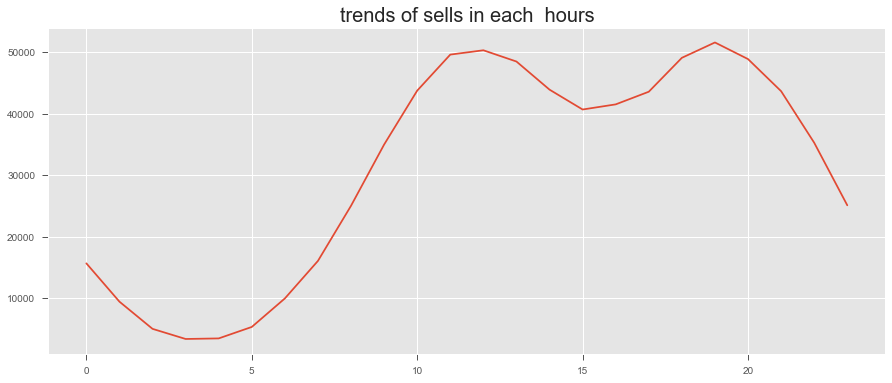

In [61]:
figure(figsize=(15, 6))
plt.plot(keys,hour)
plt.title('trends of sells in each  hours' ,fontsize=20)

<AxesSubplot:xlabel='Product'>

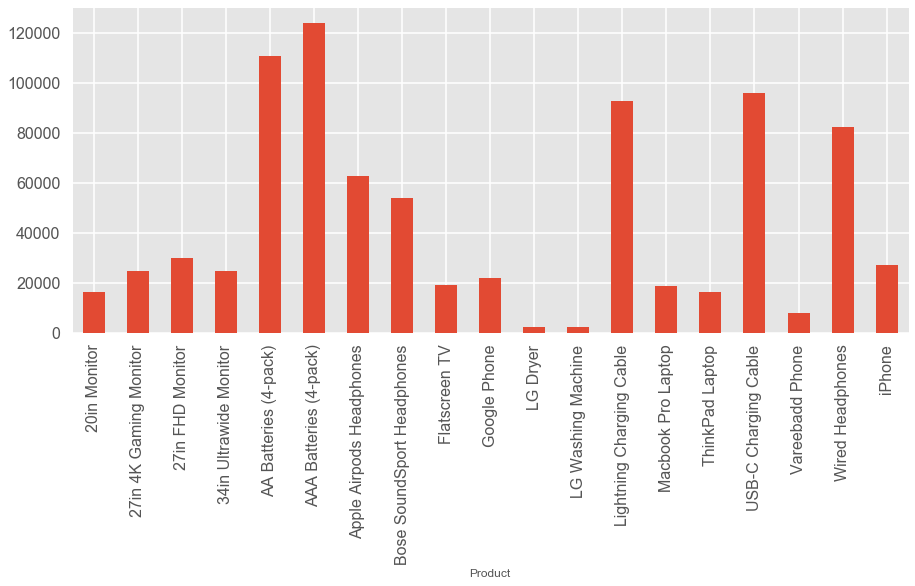

In [76]:
figure(figsize=(15, 6))
plt.style.use(['ggplot'])
dataset.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

<AxesSubplot:xlabel='Product'>

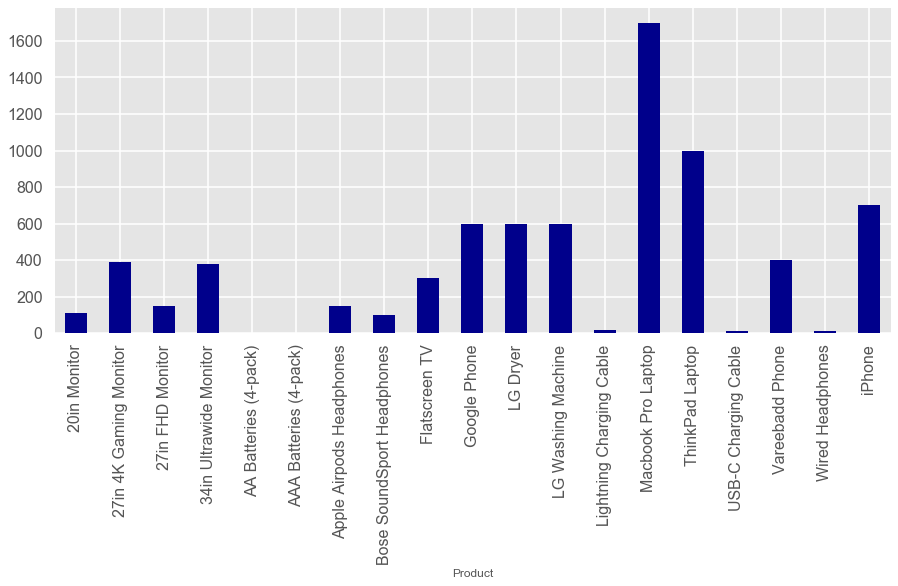

In [79]:
figure(figsize=(15, 6))
dataset.groupby('Product')['Price Each'].mean().plot(kind='bar',color="darkblue")

In [80]:
product=dataset.groupby('Product')['Quantity Ordered'].sum().index
quantity=dataset.groupby('Product')['Quantity Ordered'].sum()
price=dataset.groupby('Product')['Price Each'].mean()

<ipython-input-103-216078dd6191>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical' , size=6 , fontsize=16)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 1440x144 with 0 Axes>

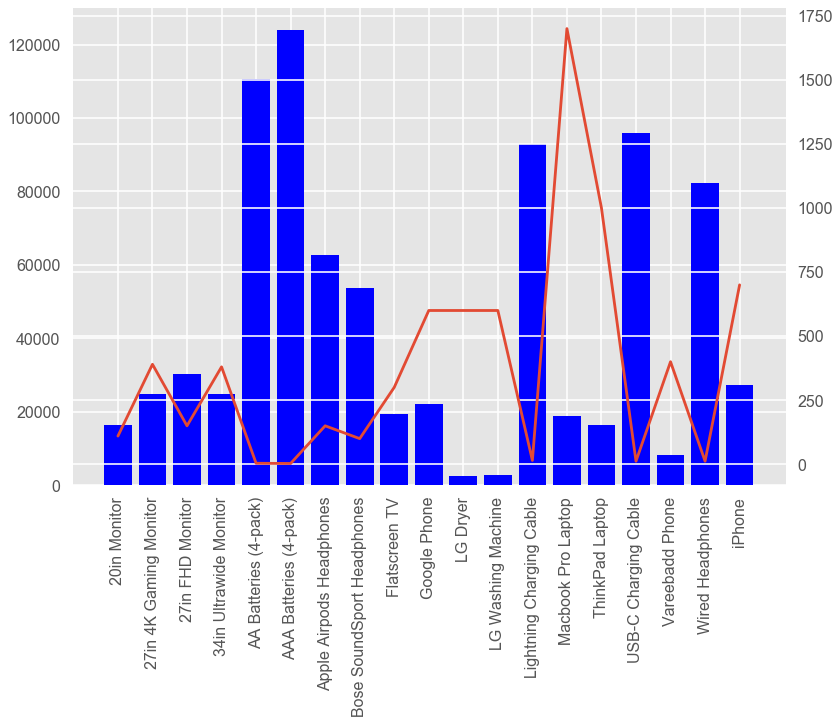

In [103]:
figure(figsize=(20,2))
fig,ax1 = plt.subplots()
ax2=ax1.twinx()
ax1.bar(product,quantity,color='blue')
ax2.plot(product,price)
ax1.set_xticklabels(product, rotation='vertical' , size=6 , fontsize=16)

In [81]:
##twinx() Function. The Axes. twinx() function in axes module of matplotlib library is used to create a twin Axes sharing the xaxis.

In [83]:
product

Index(['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor',
       '34in Ultrawide Monitor', 'AA Batteries (4-pack)',
       'AAA Batteries (4-pack)', 'Apple Airpods Headphones',
       'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone',
       'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable',
       'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable',
       'Vareebadd Phone', 'Wired Headphones', 'iPhone'],
      dtype='object', name='Product')

In [114]:
df=dataset['Order ID'].duplicated(keep=False)

In [115]:
data_by_order=dataset[df]

In [117]:
data_by_order.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24.0,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,100.0,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,14


In [119]:
data_by_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

0        USB-C Charging Cable,USB-C Charging Cable,USB-...
2        Bose SoundSport Headphones,Bose SoundSport Hea...
3        Google Phone,Wired Headphones,Google Phone,Wir...
4        Google Phone,Wired Headphones,Google Phone,Wir...
5        Wired Headphones,Wired Headphones,Wired Headph...
                               ...                        
11681    AAA Batteries (4-pack),AAA Batteries (4-pack),...
11682                          iPhone,iPhone,iPhone,iPhone
11683                          iPhone,iPhone,iPhone,iPhone
11684    34in Ultrawide Monitor,34in Ultrawide Monitor,...
11685    USB-C Charging Cable,USB-C Charging Cable,USB-...
Name: Product, Length: 743800, dtype: object

In [120]:
data_by_order['Product_order_together']=data_by_order.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [121]:
data_by_order

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,City,Hour,Product_order_together
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,24.0,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,100.0,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.0,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,12.0,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,12.0,Los Angeles,9,"Wired Headphones,Wired Headphones,Wired Headph..."
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,9.0,Los Angeles,20,"AAA Batteries (4-pack),AAA Batteries (4-pack),..."
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.0,San Francisco,16,"iPhone,iPhone,iPhone,iPhone"
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.0,San Francisco,7,"iPhone,iPhone,iPhone,iPhone"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,380.0,San Francisco,17,"34in Ultrawide Monitor,34in Ultrawide Monitor,..."


In [130]:
data_by_order=data_by_order.drop_duplicates(subset=['Order ID'])

<AxesSubplot:ylabel='Product_order_together'>

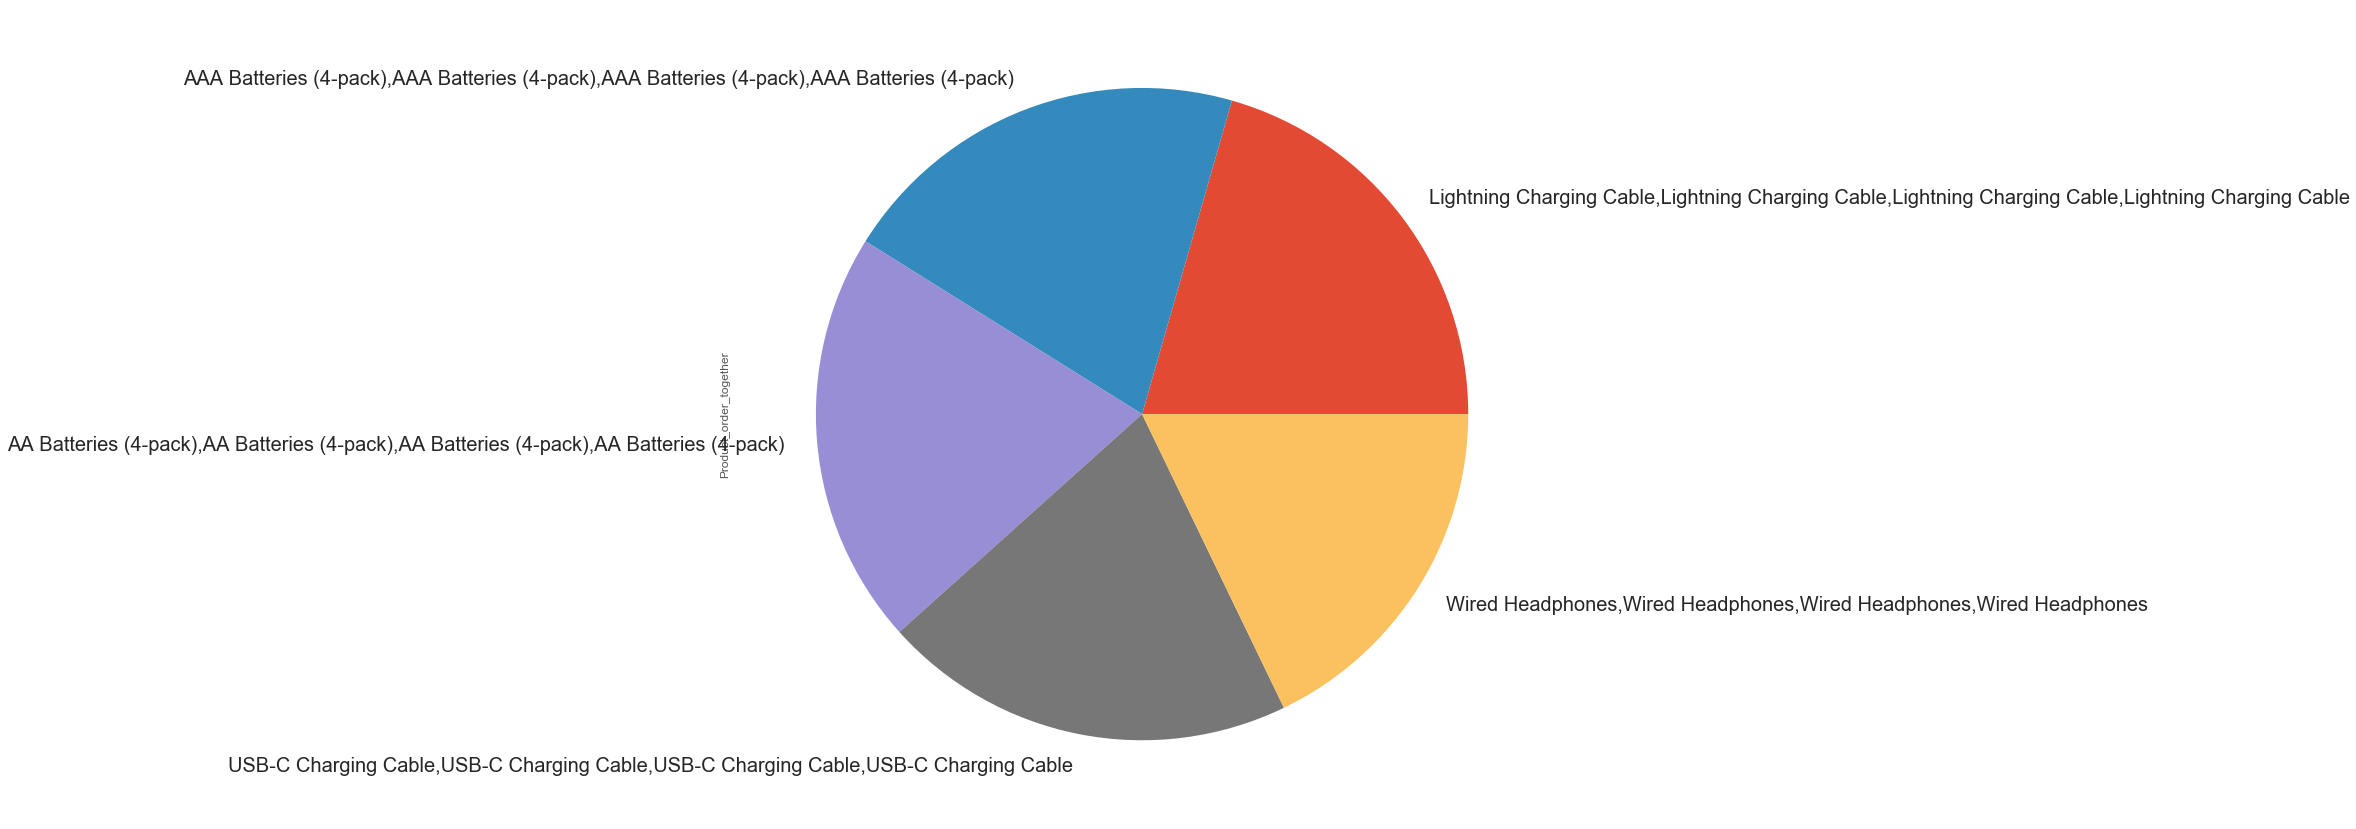

In [140]:
figure(figsize=(15,15))
plt.style.use(['ggplot'])
data_by_order['Product_order_together'].value_counts()[0:5].plot.pie(fontsize=20)